In [2]:
## Vendas por Cidade

In [98]:
import pandas as pd
import matplotlib.pyplot as plt


In [9]:
df1 = pd.read_excel("datasets/Aracaju.xlsx")
df2 = pd.read_excel("datasets/Fortaleza.xlsx")
df3 = pd.read_excel("datasets/Natal.xlsx")
df4 = pd.read_excel("datasets/Recife.xlsx")
df5 = pd.read_excel("datasets/Salvador.xlsx")

In [10]:
df1.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [11]:
## juntando os arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [12]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [13]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [14]:
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde
119,Salvador,2019-03-02,136.37,1034,2
101,Aracaju,2018-01-01,16.62,1520,9
48,Recife,2019-01-01,141.19,980,7
66,Natal,2019-03-24,559.00,853,2
129,Natal,2019-01-02,125.66,1037,1
17,Aracaju,2018-01-01,162.19,1522,9
80,Recife,2019-01-01,114.14,982,8
183,Salvador,2019-01-02,120.23,1037,2
141,Salvador,2019-03-02,9.08,1036,1
141,Fortaleza,2019-03-02,182.75,983,8


In [15]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [16]:
# alterando tipo de dado
df["LojaID"] = df["LojaID"].astype("object")

In [17]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [18]:
## Valores faltante
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [20]:
## Valores Nulos pela média
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [21]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [22]:
df["Vendas"].mean()

122.61180089485438

In [23]:
## Valores Nulos por 0
df["Vendas"].fillna(0, inplace=True)

In [24]:
## Apagando linhas com valores Nulos

In [25]:
df.dropna(inplace=True)

In [26]:
## Apagando linhas com valores Nulos em uma coluna
df.dropna(subset=["Vendas"], inplace=True)

### Nova culuna

In [27]:
### Coluna Receita
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [28]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [29]:
# maior receita
df["Receita"].max()

3544.0

In [30]:
# menor receita
df["Receita"].min()

3.34

In [31]:
# nlargest
df.nlargest(3,"Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [32]:
# nsamllest
df.nsmallest(3,"Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [33]:
# Agrupando por Cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [34]:
# ordenando conjunto de dados
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


## Data

In [35]:
# agrupamento por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [36]:
# culuna com ano_venda
df["Ano_Venda"] = df["Data"].dt.year

In [39]:
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda
142,Natal,2019-01-02,7.12,1034,1,7.12,2019
61,Fortaleza,2019-01-01,37.41,1002,5,187.05,2019
79,Fortaleza,2019-01-01,41.25,1005,6,247.50,2019
50,Aracaju,2018-01-01,7.52,1522,5,37.60,2018
103,Recife,2019-01-01,41.65,982,3,124.95,2019
72,Natal,2018-05-02,612.00,854,4,2448.00,2018
38,Recife,2019-01-01,104.53,983,4,418.12,2019
92,Fortaleza,2019-01-01,3.49,1005,4,13.96,2019
194,Salvador,2019-01-02,156.47,1035,1,156.47,2019
26,Aracaju,2018-01-01,6.98,1521,10,69.80,2018


In [41]:
# extraindo mês e o dia de venda
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [42]:
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda
151,Salvador,2019-01-02,14.63,1035,1,14.63,2019,1,2
128,Aracaju,2018-01-01,37.49,1521,2,74.98,2018,1,1
33,Recife,2019-01-01,32.33,982,1,32.33,2019,1,1
228,Natal,2019-01-02,6.87,1037,3,20.61,2019,1,2
238,Salvador,2019-01-03,139.64,1035,1,139.64,2019,1,3
103,Recife,2019-01-01,41.65,982,3,124.95,2019,1,1
84,Salvador,2019-01-01,22.99,1036,1,22.99,2019,1,1
174,Salvador,2019-01-02,35.30,1037,1,35.30,2019,1,2
194,Natal,2019-01-02,156.47,1035,1,156.47,2019,1,2
198,Natal,2019-01-02,13.65,1037,3,40.95,2019,1,2


In [43]:
# coluna trimestre
df["trimestre_venda"] = df["Data"].dt.quarter

In [49]:
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,trimestre_venda
126,Natal,2019-01-02,41.69,1036,2,83.38,2019,1,2,1
205,Salvador,2019-01-02,196.09,1037,1,196.09,2019,1,2,1
41,Salvador,2019-02-13,9.86,1035,2,19.72,2019,2,13,1
4,Salvador,2019-02-14,19.47,1037,3,58.41,2019,2,14,1
196,Natal,2019-01-02,145.09,1036,2,290.18,2019,1,2,1
5,Natal,2019-03-30,674.00,854,2,1348.00,2019,3,30,1
145,Salvador,2019-01-02,84.62,1034,2,169.24,2019,1,2,1
47,Aracaju,2018-01-01,80.46,1520,2,160.92,2018,1,1,1
64,Recife,2019-01-01,89.32,983,2,178.64,2019,1,1,1
64,Fortaleza,2019-01-01,110.31,1005,4,441.24,2019,1,1,1


In [51]:
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [73]:
vendas_marco_19.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,trimestre_venda
137,Fortaleza,2019-03-02,51.99,983,3,155.97,2019,3,2,1
117,Recife,2019-03-02,15.42,983,8,123.36,2019,3,2,1
139,Recife,2019-03-02,141.16,980,7,988.12,2019,3,2,1
109,Salvador,2019-03-02,124.37,1035,1,124.37,2019,3,2,1
19,Natal,2019-03-31,282.00,854,2,564.00,2019,3,31,1
137,Recife,2019-03-02,51.99,983,3,155.97,2019,3,2,1
82,Natal,2019-03-07,868.00,854,3,2604.00,2019,3,7,1
135,Recife,2019-03-02,10.79,983,5,53.95,2019,3,2,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,2019,3,2,1
141,Recife,2019-03-02,182.75,983,8,1462.00,2019,3,2,1


In [79]:
vendas_fevereiro_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 2)]

In [80]:
vendas_fevereiro_19.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,trimestre_venda
76,Natal,2019-02-20,364.00,853,2,728.00,2019,2,20,1
17,Recife,2019-02-14,142.45,981,3,427.35,2019,2,14,1
2,Recife,2019-02-10,12.94,983,5,64.70,2019,2,10,1
28,Natal,2019-02-13,705.00,853,2,1410.00,2019,2,13,1
2,Salvador,2019-02-10,173.59,1035,3,520.77,2019,2,10,1
4,Recife,2019-02-14,19.89,983,7,139.23,2019,2,14,1
36,Natal,2019-02-09,328.00,853,2,656.00,2019,2,9,1
40,Fortaleza,2019-02-13,19.13,1002,4,76.52,2019,2,13,1
53,Natal,2019-02-14,290.00,854,4,1160.00,2019,2,14,1
67,Natal,2019-02-14,379.00,852,2,758.00,2019,2,14,1


## Vizualização de Dados

In [81]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1002     30
1005     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

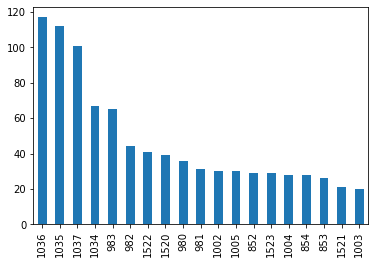

In [88]:
# gráfico de  barras
df["LojaID"].value_counts(ascending=False).plot.bar();

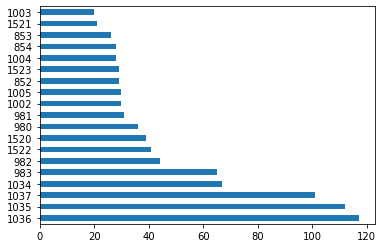

In [89]:
# gráfico de  barras horizontais
df["LojaID"].value_counts(ascending=False).plot.barh();

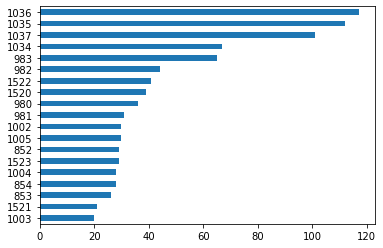

In [90]:
# gráfico de  barras horizontais
df["LojaID"].value_counts(ascending=True).plot.barh();

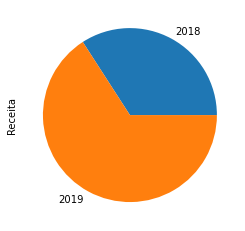

In [93]:
# gráfico de Pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

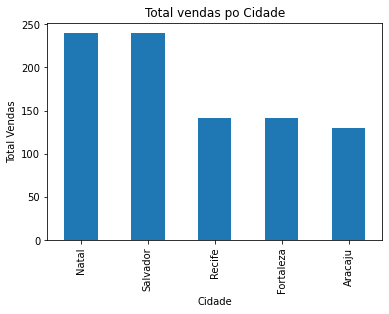

In [95]:
# Vendas por cidade
df["Cidade"].value_counts().plot.bar(title="Total vendas po Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

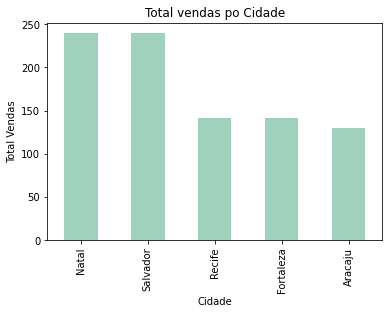

In [96]:
# Vendas por cidade
df["Cidade"].value_counts().plot.bar(title="Total vendas po Cidade", color="#9FD1BC")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [99]:
# estilo
plt.style.use("ggplot")

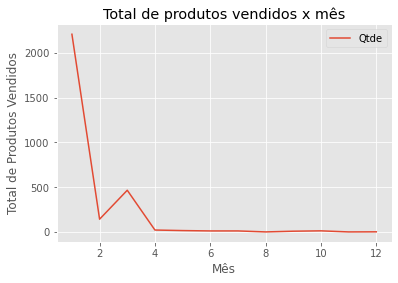

In [102]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title="Total de produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total de Produtos Vendidos")
plt.legend();

In [105]:
# vendas de 2019
df_2019 = df[df["Ano_Venda"] == 2019]

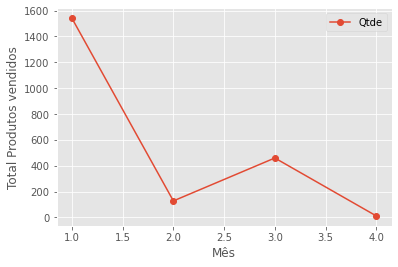

In [107]:
# produtos vendidos por mês em 2019
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "o")
plt.xlabel("Mês")
plt.ylabel("Total Produtos vendidos")
plt.legend();

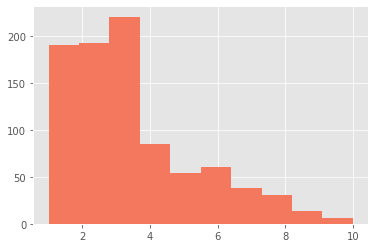

In [111]:
# histograma
plt.hist(df["Qtde"], color="#F4785E");

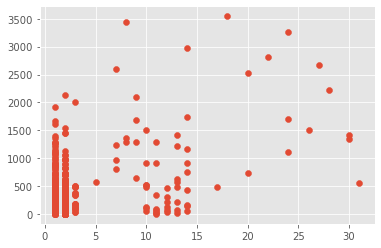

In [112]:
# gráfico de dispersão 
plt.scatter(x=df_2019["dia_venda"], y = df_2019["Receita"]);

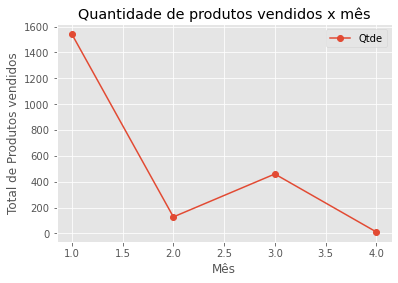

In [113]:
# salvando em png
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "o")
plt.title("Quantidade de produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total de Produtos vendidos");
plt.legend()
plt.savefig("Gráfico QTDE X MES.png")